In [ ]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# LOAD DATA
school = pd.read_csv("School_Info.csv")
student = pd.read_csv("Student_Records.csv")
teacher = pd.read_csv("Teacher_Deployment.csv")
district = pd.read_csv("District_Level_Stats.csv")


In [ ]:
# df.head()

In [ ]:
# DATA CLEANING
# Merge student + school
df = pd.merge(student, school, on="School_ID")
df.head()

,Student_ID,School_ID,Grade,Gender,Socioeconomic_Status,Attendance_Rate,Previous_Year_GPA,Dropout_Status,Early_Pregnancy,Abortion,District,Location_Type,Infrastructure_Score,Electricity_Access,Internet_Access,Library_Status
0,STU00001,SCH495,9,Other,Medium,70.96,3.10,N,N,N,Lalitpur,Urban,2.9,Y,Y,N
1,STU00002,SCH407,10,F,Low,51.70,2.07,N,N,N,Kathmandu,Rural,1.7,Y,N,N
2,STU00003,SCH378,1,M,Medium,NaN,3.44,N,N,N,Kathmandu,Rural,2.6,Y,Y,Y
3,STU00004,SCH167,8,F,Low,75.00,1.09,N,N,N,Sindhupalchok,Rural,2.0,Y,N,N
4,STU00005,SCH126,1,M,Low,69.42,3.47,N,N,N,Dhading,Rural,1.1,N,N,N


In [ ]:
# Drop nulls and duplicates
df = df.dropna()
df = df.drop_duplicates()


In [ ]:
# Encode categorical columns
cat_cols = ['Gender', 'Socioeconomic_Status', 'Location_Type', 'Electricity_Access',
            'Internet_Access', 'Library_Status', 'Early_Pregnancy', 'Abortion']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
# Normalize numerical fields
scaler = MinMaxScaler()
df_encoded[['Attendance_Rate', 'Previous_Year_GPA', 'Infrastructure_Score']] = scaler.fit_transform(
    df_encoded[['Attendance_Rate', 'Previous_Year_GPA', 'Infrastructure_Score']]
)

In [ ]:
# LOGISTIC REGRESSION (DROPOUT PREDICTION)

X = df_encoded.drop(columns=['Dropout_Status', 'Student_ID', 'School_ID', 'District'])
y = LabelEncoder().fit_transform(df_encoded['Dropout_Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Results
[[6155  376]
 [2249  253]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82      6531
           1       0.40      0.10      0.16      2502

    accuracy                           0.71      9033
   macro avg       0.57      0.52      0.49      9033
weighted avg       0.64      0.71      0.64      9033



In [ ]:
# CLUSTERING (K-MEANS ON INFRASTRUCTURE)
infra_df = school[['School_ID', 'Infrastructure_Score', 'Location_Type']]
infra_df['Infra_Score_Scaled'] = scaler.fit_transform(infra_df[['Infrastructure_Score']])

kmeans = KMeans(n_clusters=3, random_state=42)
infra_df['Infra_Cluster'] = kmeans.fit_predict(infra_df[['Infra_Score_Scaled']])


/tmp/ipython-input-15-531785693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infra_df['Infra_Score_Scaled'] = scaler.fit_transform(infra_df[['Infrastructure_Score']])
/tmp/ipython-input-15-531785693.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infra_df['Infra_Cluster'] = kmeans.fit_predict(infra_df[['Infra_Score_Scaled']])


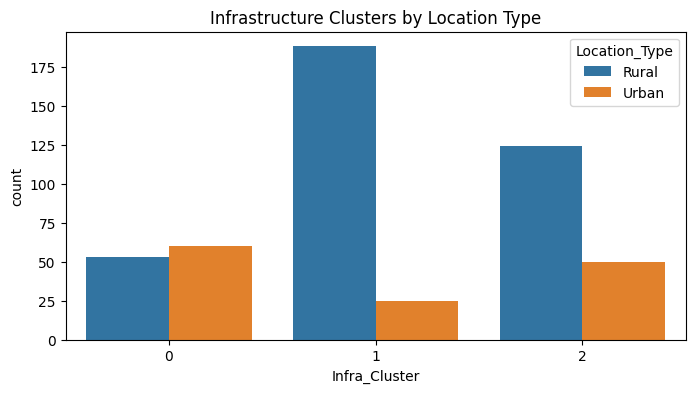

In [ ]:
# Visualize Clusters
plt.figure(figsize=(8, 4))
sns.countplot(data=infra_df, x='Infra_Cluster', hue='Location_Type')
plt.title("Infrastructure Clusters by Location Type")
plt.show()


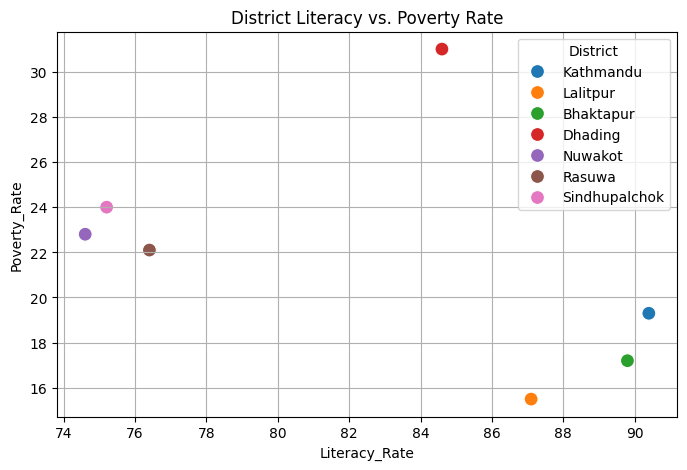

In [ ]:
# VISUALIZATION (MAP + COMPARISON)
# Plot literacy vs. poverty
plt.figure(figsize=(8, 5))
sns.scatterplot(data=district, x="Literacy_Rate", y="Poverty_Rate", hue="District", s=100)
plt.title("District Literacy vs. Poverty Rate")
plt.grid(True)
plt.show()

In [ ]:
#  SAVE FINAL OUTPUT FILES FOR SUBMISSION
df_encoded.to_csv("Cleaned_Student_DropoutData.csv", index=False)
infra_df.to_csv("School_Infra_Clusters.csv", index=False)

In [ ]:
#import libraries for gantt chart (timeline)
import plotly.express as px
import pandas as pd

In [ ]:
# Define tasks
import pandas as pd
import plotly.express as px # Import plotly.express here as it's used in the next cell

data = [
    dict(Task="Education System Analysis", Start='2025-05-01', Finish='2025-06-15'),
    dict(Task="Data Acquisition & Preprocessing", Start='2025-05-15', Finish='2025-07-15'),
    dict(Task="Exploratory Data Analysis", Start='2025-06-01', Finish='2025-08-01'),
    dict(Task="Model Development", Start='2025-07-01', Finish='2025-09-30'),
    dict(Task="Model Evaluation", Start='2025-08-01', Finish='2025-09-30'),
    dict(Task="Comparative Analysis", Start='2025-08-15', Finish='2025-10-15'),
    dict(Task="Presentation Preparation", Start='2025-09-15', Finish='2025-10-20'),
]

df = pd.DataFrame(data)

In [ ]:
# Create Gantt chart
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task", color="Task")
fig.update_yaxes(categoryorder="total ascending")
fig.update_layout(title="Education Project Gantt Chart (Bagmati Province)")
fig.show()

2025-07-20 13:06:16.249 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 13:06:16.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 13:06:16.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 13:06:17.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 13:06:17.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 13:06:17.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-20 13:06:17.468 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

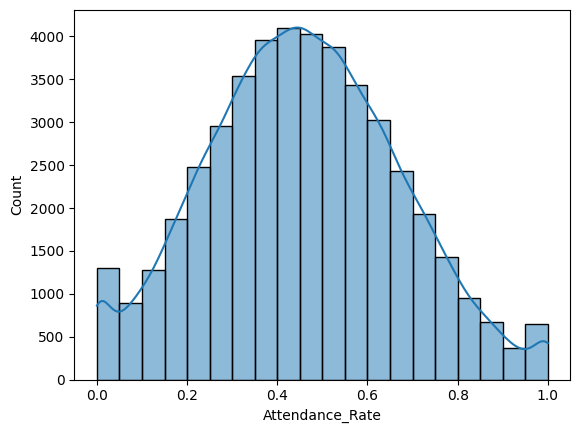

In [ ]:
# Attendance distribution
st.header("Attendance Rate Distribution")
fig, ax = plt.subplots()
sns.histplot(student_data['Attendance_Rate'], bins=20, kde=True, ax=ax)
st.pyplot(fig)

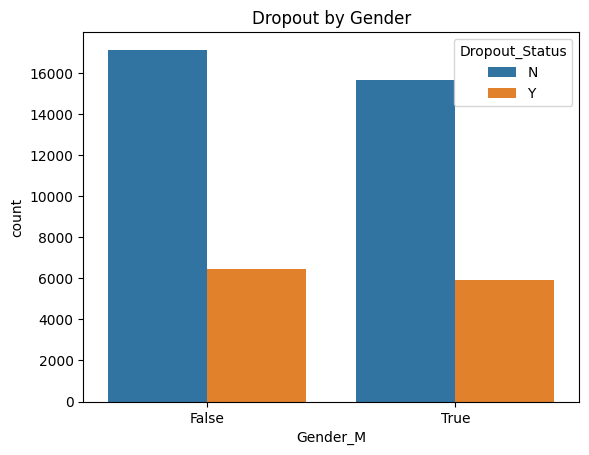

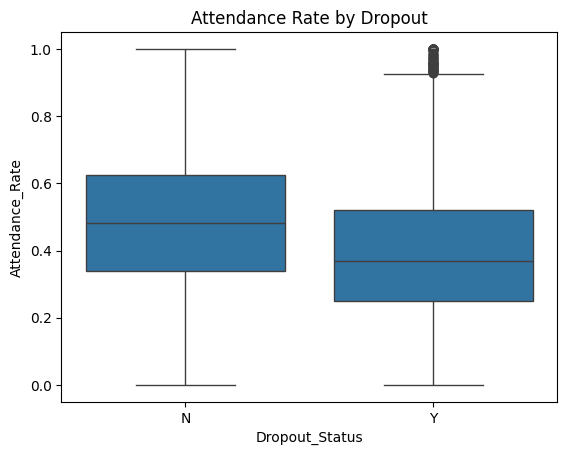

In [ ]:
# Dropout distribution by gender
sns.countplot(data=df_encoded, x='Gender_M', hue='Dropout_Status')
plt.title("Dropout by Gender")
plt.show()

# Attendance rate vs dropout
sns.boxplot(x="Dropout_Status", y="Attendance_Rate", data=df_encoded)
plt.title("Attendance Rate by Dropout")
plt.show()

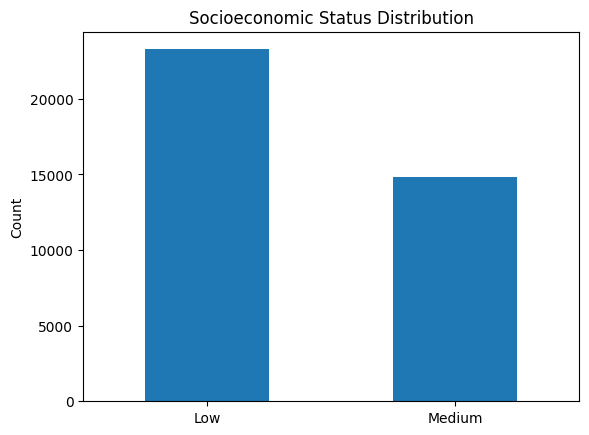

In [ ]:
# Distribution of Socioeconomic Status (using encoded columns)
df_encoded[['Socioeconomic_Status_Low', 'Socioeconomic_Status_Medium']].sum().plot(kind='bar')
plt.title("Socioeconomic Status Distribution")
plt.xticks(ticks=[0, 1], labels=['Low', 'Medium'], rotation=0)
plt.ylabel("Count")
plt.show()

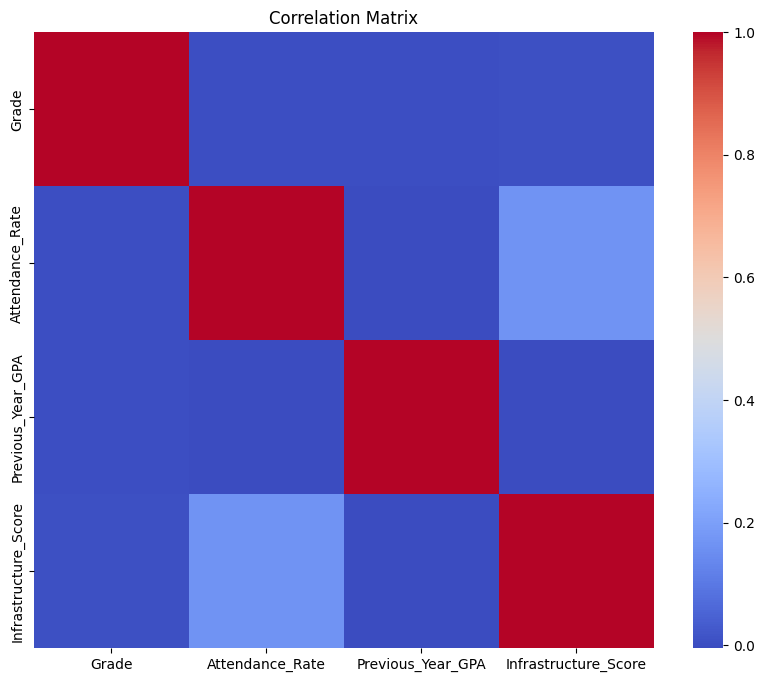

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
import streamlit as st

In [ ]:
print(df_encoded['Early_Pregnancy_Y'].unique())
print(df_encoded['Dropout_Status'].unique())

[False  True]
['N' 'Y']


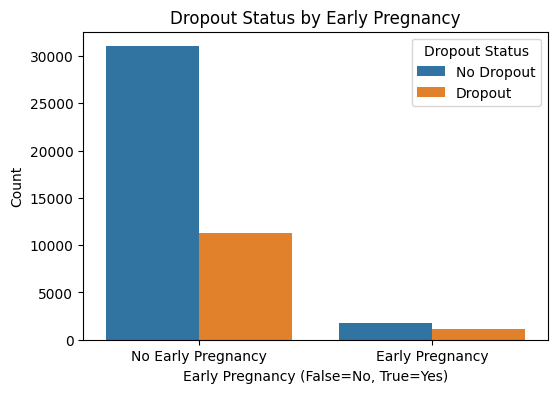

In [ ]:
# Visualize the relationship between Early Pregnancy and Dropout Status using a countplot
# Ensure Dropout_Status is numerically encoded for plotting
df_encoded['Dropout_Status_Numeric'] = LabelEncoder().fit_transform(df_encoded['Dropout_Status'])

plt.figure(figsize=(6, 4))
sns.countplot(data=df_encoded, x='Early_Pregnancy_Y', hue='Dropout_Status_Numeric')
plt.title("Dropout Status by Early Pregnancy")
plt.xlabel("Early Pregnancy (False=No, True=Yes)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['No Early Pregnancy', 'Early Pregnancy']) # Improve x-axis labels
plt.legend(title='Dropout Status', labels=['No Dropout', 'Dropout']) # Improve legend labels
plt.show()

# Optional: You can drop the temporary numeric column if no longer needed
# df_encoded = df_encoded.drop(columns=['Dropout_Status_Numeric'])

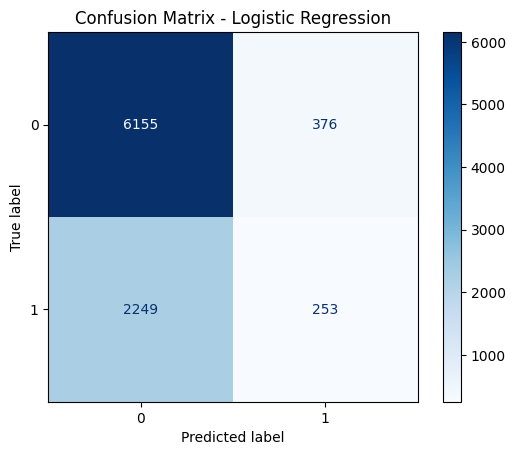

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_) # Use lr.classes_ instead of model.classes_
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("confusion_matrix_logistic.png")  # Saves image
plt.show()